In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools

%matplotlib inline

dataset1 = pd.read_csv('final_dataset.csv')
dataset1.head()

# dataset = dataset1.copy().drop(columns =['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG','HTP','ATP',
#        'HTGS', 'ATGS', 'HTGC', 'ATGC','HM1','HM2','HM3','AM1','AM2','AM3',
#        'HM4', 'HM5','AM4', 'AM5', 'MW', 'HTFormPtsStr',
#        'ATFormPtsStr'] )

dataset = dataset1.copy().drop(columns =['Date', 'FTHG', 'FTAG',
       'HTGS', 'ATGS', 'HTGC', 'ATGC'] )
# dataset['HomeTeam'] = dataset['HomeTeam'].astype('category')
# dataset['AwayTeam'] = dataset['AwayTeam'].astype('category')
# dataset['HomeTeam'] = dataset['HomeTeam'].cat.codes
# dataset['AwayTeam'] = dataset['AwayTeam'].cat.codes
dataset.head()

,Match,HomeTeam,AwayTeam,FTR,HTP,ATP,HM1,HM2,HM3,HM4,...,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,Charlton,Man City,H,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,1,Chelsea,West Ham,H,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
2,2,Coventry,Middlesbrough,NH,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,3,Derby,Southampton,NH,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0
4,4,Leeds,Everton,H,0.0,0.0,M,M,M,M,...,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [2]:
def preprocess_features(X):
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

In [3]:
X_all = dataset.drop(['FTR'],1)
y_all = dataset['FTR']



from sklearn.preprocessing import scale
cols = [['HTGD','ATGD','HTP','ATP']]
for col in cols:
    X_all[col] = scale(X_all[col])

X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

X_all = preprocess_features(X_all)
# for i in X_all.columns:
#   print(i)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.3,
                                                    random_state = 2,
                                          stratify = y_all)
for i in  X_all.columns:
  if((i > 'HomeTeam' or i > 'AwayTeam' or i > 'HM' or i > 'AM' or i> 'HTFormPtsStr' or  i > 'AM') and X_train[i][6142]==0):
    x=1
  else:
    print(i," : ", X_train[i][6142])
print("result", y_train[6142])

C:\Users\RBTC\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Match  :  6142
HomeTeam_Sunderland  :  1
AwayTeam_West Brom  :  1
HTP  :  -2.0110563047941596
ATP  :  -0.1603995194687872
HM1_L  :  1
HM2_L  :  1
HM3_L  :  1
HM4_D  :  1
HM5_L  :  1
AM1_D  :  1
AM2_W  :  1
AM3_L  :  1
AM4_D  :  1
AM5_L  :  1
MW  :  7
HTFormPtsStr_LLLDL  :  1
ATFormPtsStr_DWLDL  :  1
HTFormPts  :  1
ATFormPts  :  5
HTGD  :  -1.427901940584758
ATGD  :  0.18519360217226177
DiffPts  :  -1.0
DiffFormPts  :  -0.571428571
result NH


In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000, random_state = 1)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

Accuracy from Confusion Marix is:  66.08187134502924 %


Text(50.722222222222214, 0.5, 'Actual Label')

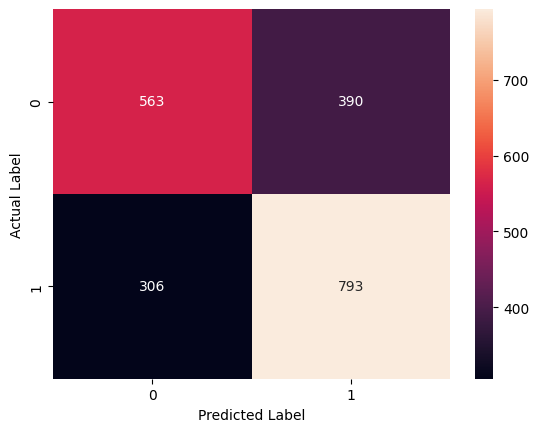

In [5]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
# 1323
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [6]:
Y_pred_proba = classifier.predict_proba(X_test)
for i in  X_all.columns:
  if((i > 'HomeTeam' or i > 'AwayTeam' or i > 'HM' or i > 'AM' or i> 'HTFormPtsStr' or  i > 'AM') and X_test[i][4835]==0):
    x=1
  else:
    print(i," : ", X_test[i][4835])
print(Y_pred_proba[2])
print("Result : ", y_test[4835])

Match  :  4835
HomeTeam_Sunderland  :  1
AwayTeam_Fulham  :  1
HTP  :  -0.3268891052657604
ATP  :  -0.1603995194687872
HM1_L  :  1
HM2_L  :  1
HM3_L  :  1
HM4_D  :  1
HM5_W  :  1
AM1_W  :  1
AM2_D  :  1
AM3_L  :  1
AM4_W  :  1
AM5_L  :  1
MW  :  28
HTFormPtsStr_LLLDW  :  1
ATFormPtsStr_WDLWL  :  1
HTFormPts  :  4
ATFormPts  :  7
HTGD  :  -0.346496742700962
ATGD  :  -0.27870420087921705
DiffPts  :  -0.107142857
DiffFormPts  :  -0.107142857
[0.22251194 0.77748806]
Result :  NH


In [7]:
print(X_test['Match'])
for i in X_test['Match']:
  print(i)

5216    5216
3155    3155
4835    4835
2496    2496
3502    3502
        ... 
5909    5909
3112    3112
2959    2959
3          3
5729    5729
Name: Match, Length: 2052, dtype: int64
5216
3155
4835
2496
3502
2228
5158
252
6833
1922
2218
3333
201
5328
6483
4174
6737
950
856
1464
2854
6684
923
99
1484
6810
3462
6446
2625
1158
5490
6453
6024
5865
2187
556
3253
4719
6390
3964
5324
3843
5721
1138
4616
1227
2336
6009
775
362
4426
3908
2848
2867
3207
4123
1241
3720
1045
3222
3474
2898
4634
3325
4819
335
1337
4210
793
6481
4667
4953
2872
3364
2815
3893
368
820
4356
1366
939
3277
4997
4534
4120
6284
4642
4495
1032
4286
585
3723
4844
3239
6354
4855
1966
5942
2140
6064
3466
6080
1568
1458
2835
3489
3579
2575
316
3848
5118
2322
4212
6546
925
3558
2772
2029
454
710
4530
994
1373
3822
1879
1314
3631
1455
1625
5167
6124
1826
6396
1
557
1839
5951
6431
652
3654
2836
656
1935
3940
2828
3923
3043
6465
1332
2286
2169
4332
6542
300
3515
1788
4653
3820
1634
795
5954
1686
6153
4843
2765
812
3777
3322
2416
93

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', n_estimators=2000, min_samples_leaf=1, min_samples_split=5,max_features='auto',oob_score=True,random_state=1,n_jobs=-1)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=2000, n_jobs=-1,
                       oob_score=True, random_state=1)

Accuracy from Confusion Marix is:  65.59454191033139 %


Text(50.722222222222214, 0.5, 'Actual Label')

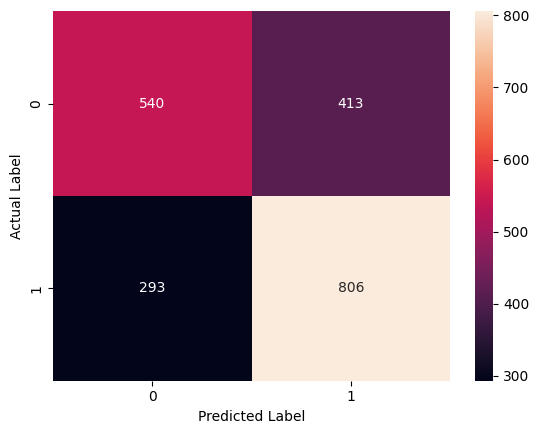

In [9]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
#RFC 1320
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [10]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(120,80,60),activation = 'tanh',random_state=1, max_iter=100000)
classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(120, 80, 60),
              max_iter=100000, random_state=1)

Accuracy from Confusion Marix is:  63.4990253411306 %


Text(50.722222222222214, 0.5, 'Actual Label')

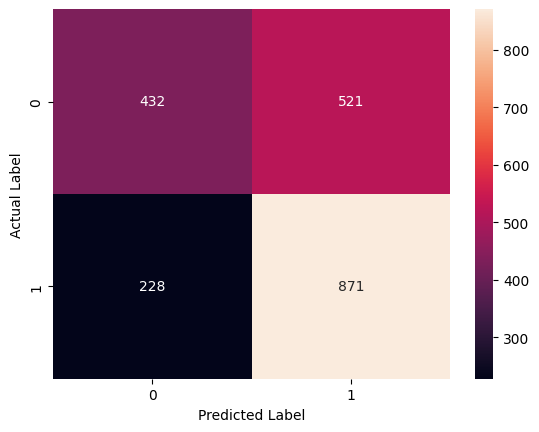

In [11]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
#RFC 1320
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [12]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(1.0)
classifier = GaussianProcessClassifier(kernel=kernel,random_state=1)
classifier.fit(X_train, y_train)

c:\Users\RBTC\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\gaussian_process\kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=1)

Accuracy from Confusion Marix is:  53.3625730994152 %


Text(50.722222222222214, 0.5, 'Actual Label')

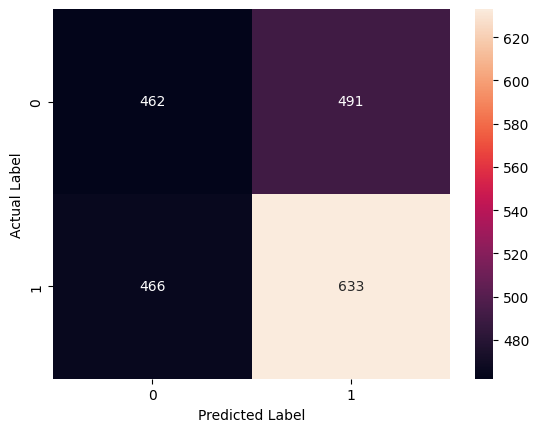

In [13]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Accuracy from Confusion Marix is:  52.92397660818714 %


Text(50.722222222222214, 0.5, 'Actual Label')

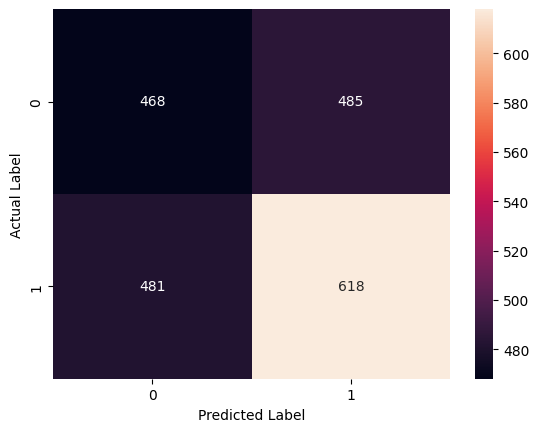

In [15]:
Y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, Y_pred)
sns.heatmap(cm, annot=True,fmt='d')
DS = cm.trace()
TS= cm.sum()
#dividing accurate to total to calculate accuracy 
print("Accuracy from Confusion Marix is: ", (DS/TS)*100, "%")
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')